In [1]:
# all import statements 

from IPython.display import Image
import logging
logger = logging.getLogger()
logger.setLevel('INFO')
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (40, 40)
import networkx as nx
from sklearn.preprocessing import minmax_scale

# importing own modules
import comment_thread as ct
import author_network as an
import multi_comment_thread as mct
from notebook_helper.process_data import *
from notebook_helper.access_funs import *
from plotting.threads import *
from plotting.network import *
from plotting.overview import *
from plotting.heatmap import *
from plotting.components import *

SBSTYLE = 'seaborn-paper'

%load_ext autoreload
%autoreload 2

In [18]:
PM_FRAME = concatenate_project_dfs(
            process_pms(*range(1, 14)))
ALL_AUTHORS = set.union(*PM_FRAME['all threads', 'authors'].tolist())

<div id="div-comment-115409">
<div class="comment-author vcard">
<img alt="" class="avatar avatar-32" height="32" src="https://1.gravatar.com/avatar/a23b9df554f5ee2e60fdc13645e4c50d?s=32&amp;d=identicon&amp;r=G" width="32"/> <p>Jeff Kahn mentioned to me the beautiful “<a href="http://www.openproblemgarden.org/op/wide_partition_conjecture" rel="nofollow">Wide Partition Conjecture</a>” from the paper: T. Chow, C.K. Fan, M.X. Goemans and J. Vondrak, <cite>Wide Partitions, Latin Tableaux, and Rota’s Basis Conjecture</cite>, Advances in Applied Mathematics, 31, 334–358, 2003. <a href="http://math.mit.edu/~goemans/PAPERS/wide.pdf" rel="nofollow">pdf</a> . (I think this conjecture might be interesting also in the Tverberg context we mensioned above.) Perhaps, Tim, you can explain and motivate this conjecture and its relation to Rota’s conjecture?</p>
<div class="pd-rating" id="pd_rating_holder_133283_comm_115409"></div> <p><cite>Comment by <span class="fn"><a class="url" href="http://www.ma.h

Rota’s Basis Conjecture: Polymath 12, post 3
Rota‘s Basis Conjecture: Poltmath 12, post 3


# Case Study

In [19]:
PM4_FOCUS={'project': "Polymath 4", 'thread_type': "research threads", 'stage':2}

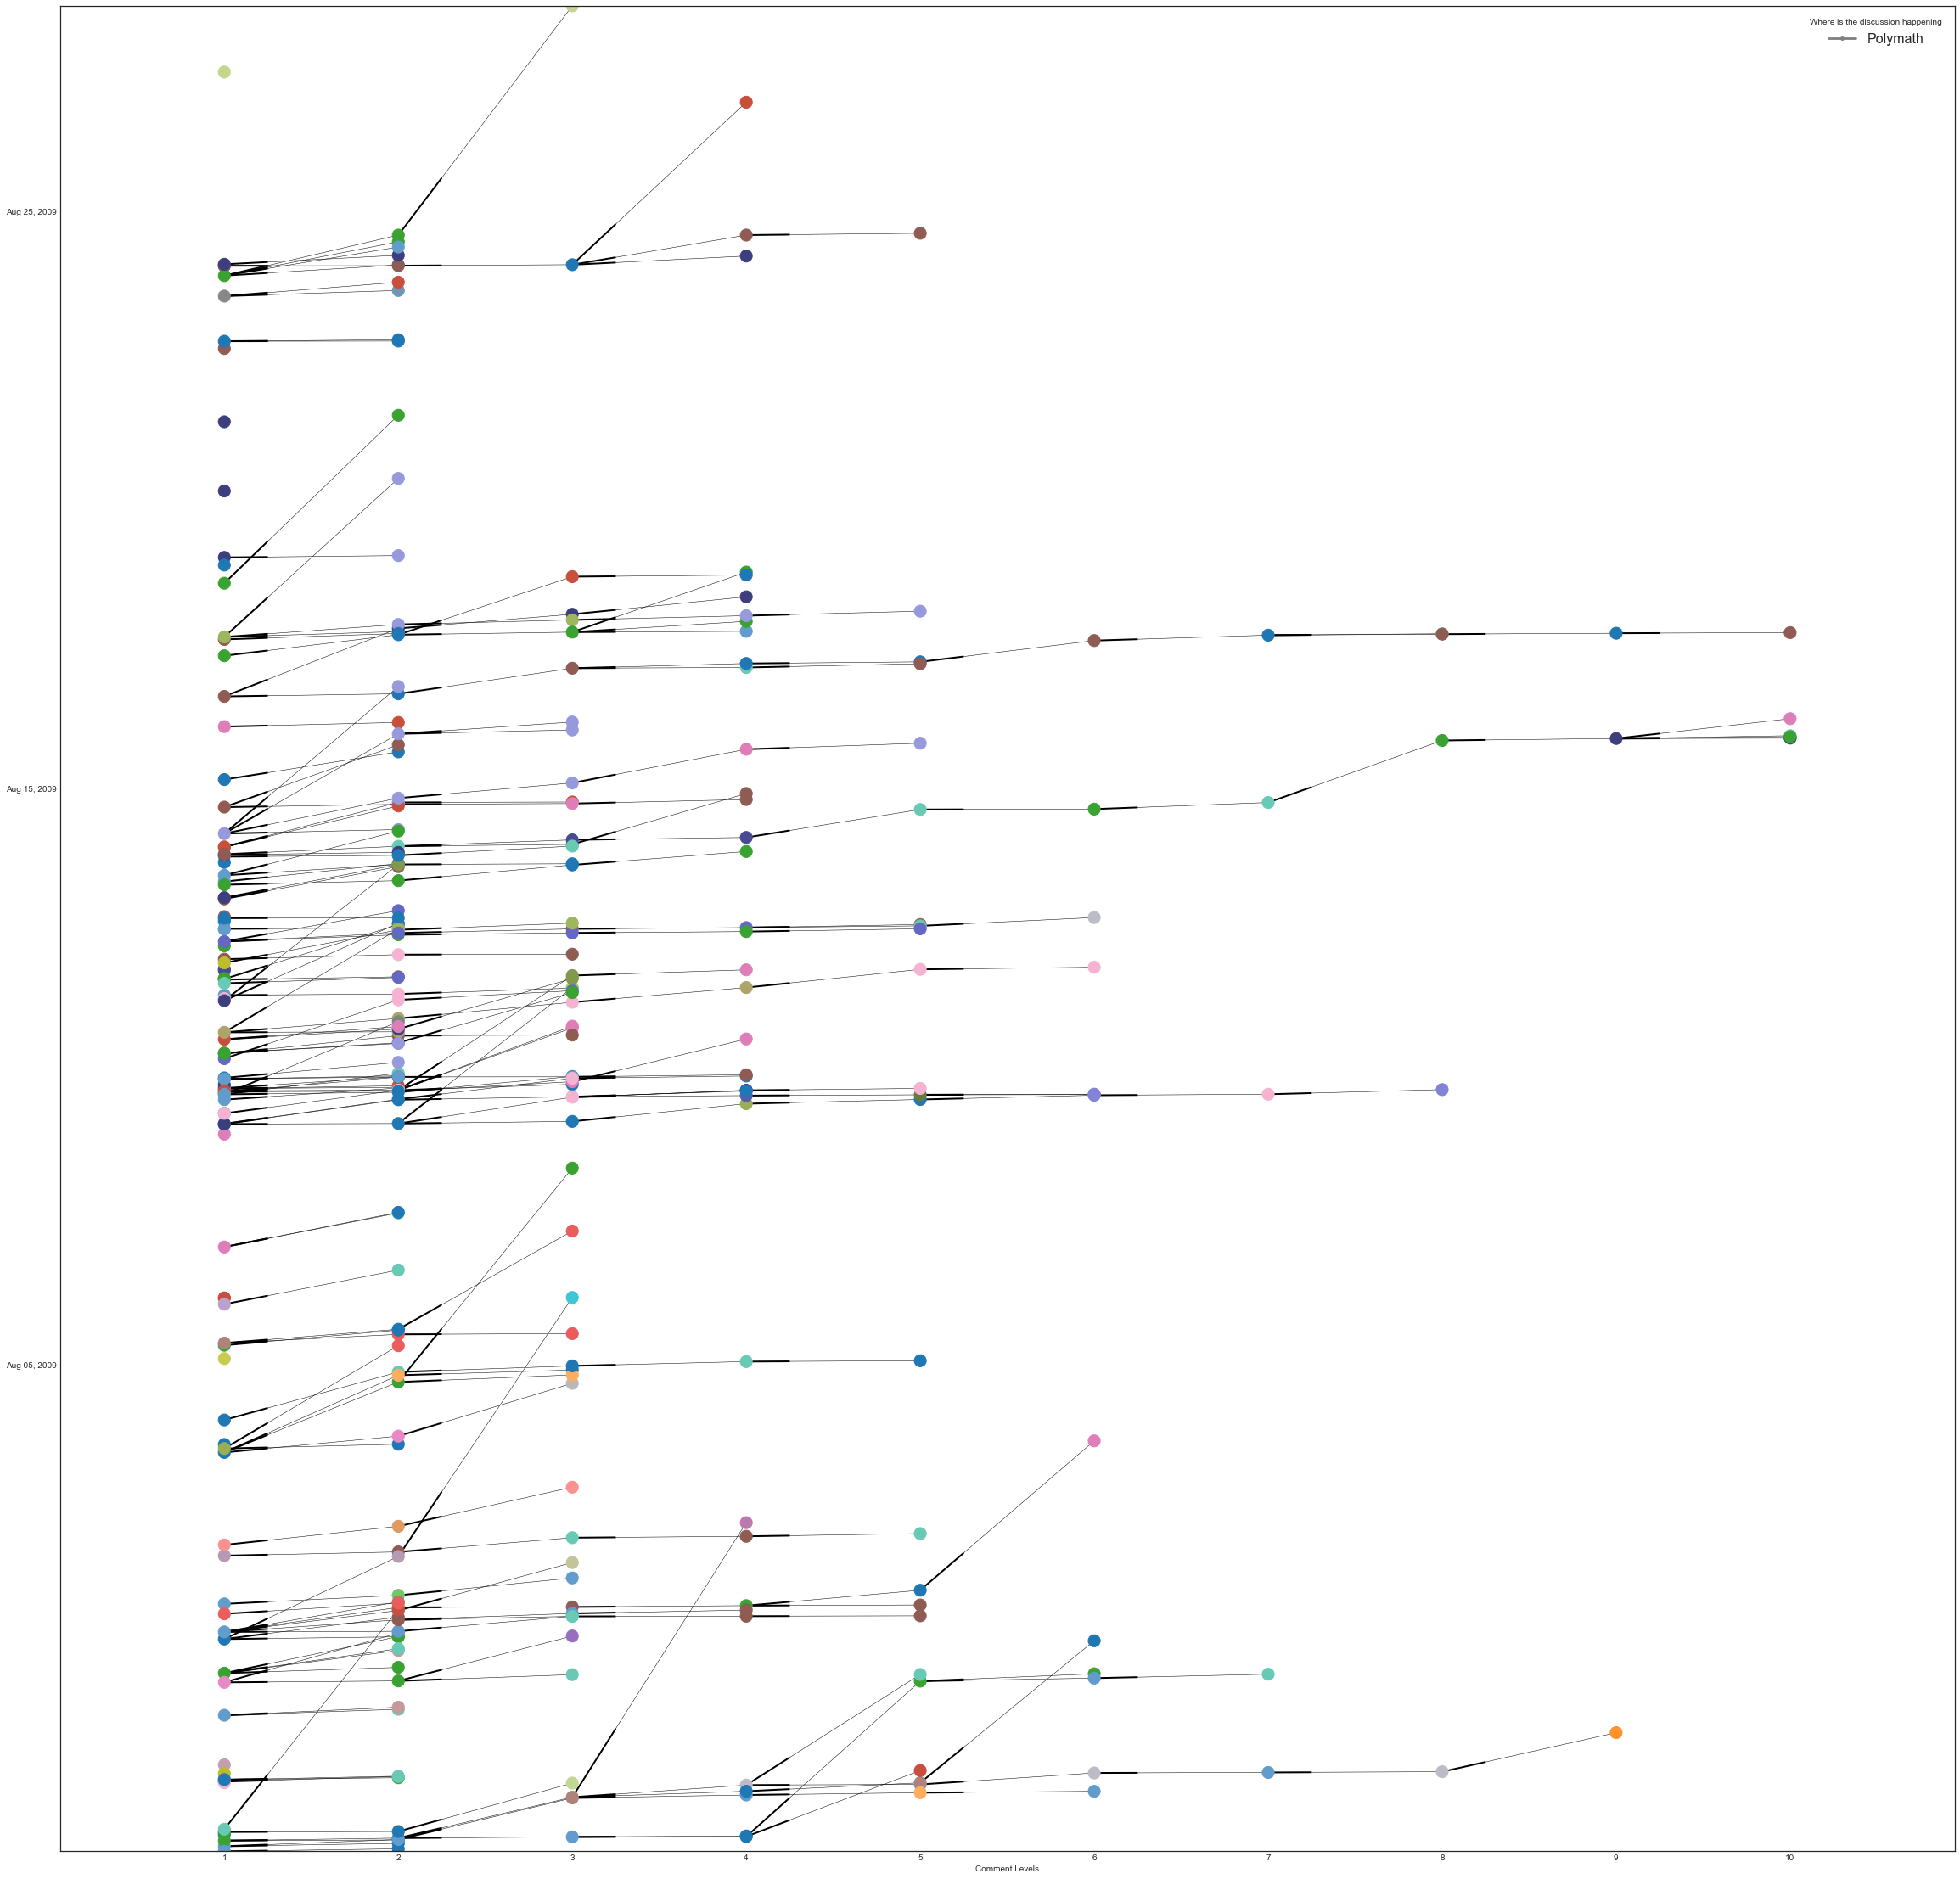

In [20]:
plot_discussion_tree(PM_FRAME, **PM4_FOCUS, show=True, remove_title=True)

# save as tree_example

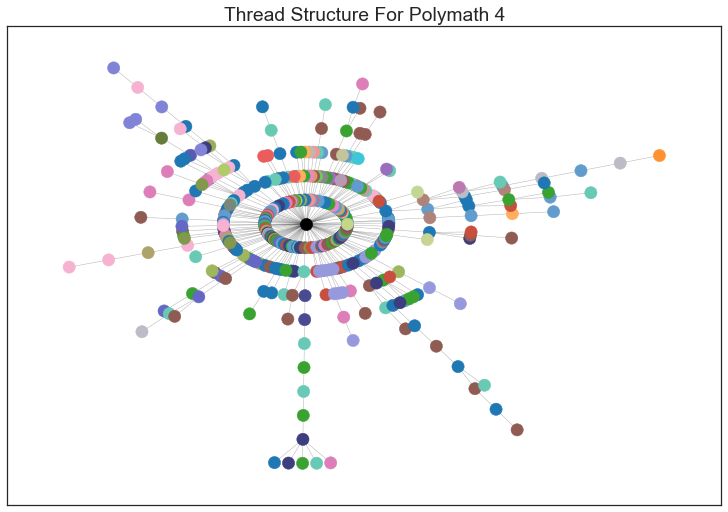

In [21]:
# currently not used
plot_discussion_tree_radial(PM_FRAME, **PM4_FOCUS)

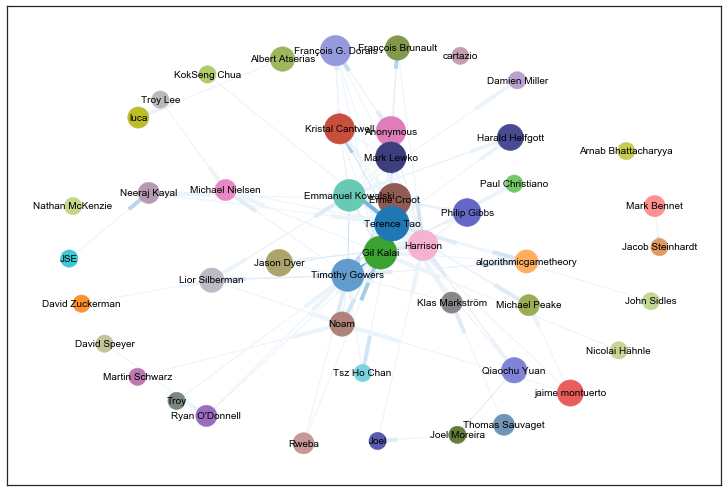

In [22]:
draw_network(PM_FRAME, **PM4_FOCUS, fontsize=10, show=True, remove_title=True)

# save as i_network_example

# Centre of Discussion

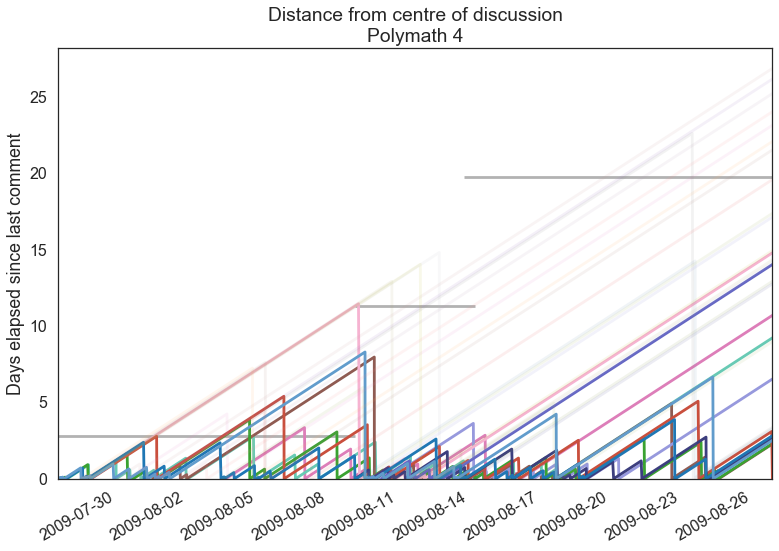

In [23]:
plot_distance_from_centre(PM_FRAME, **PM4_FOCUS, show=True)

# save as distances

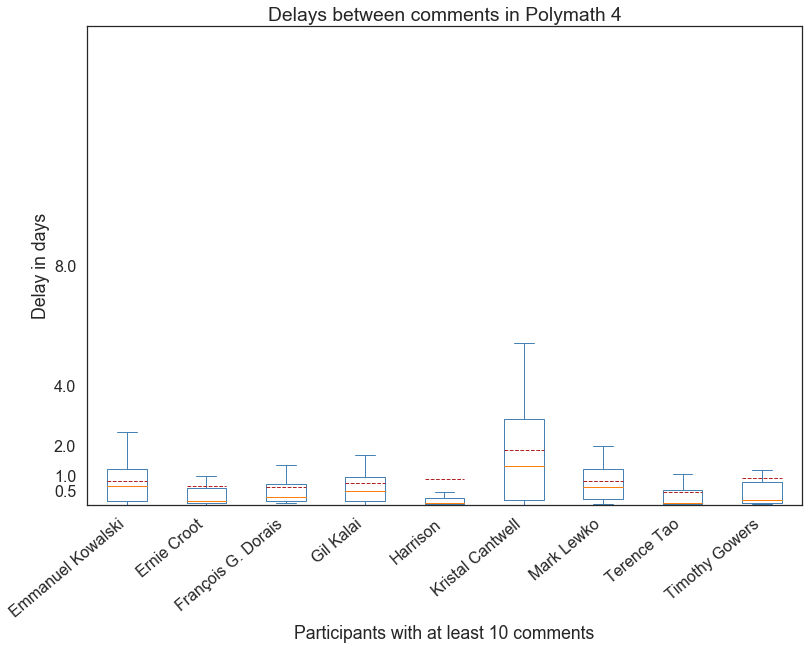

In [24]:
plot_delays_boxplot(PM_FRAME, **PM4_FOCUS, show=True)

# save as delays_boxplot

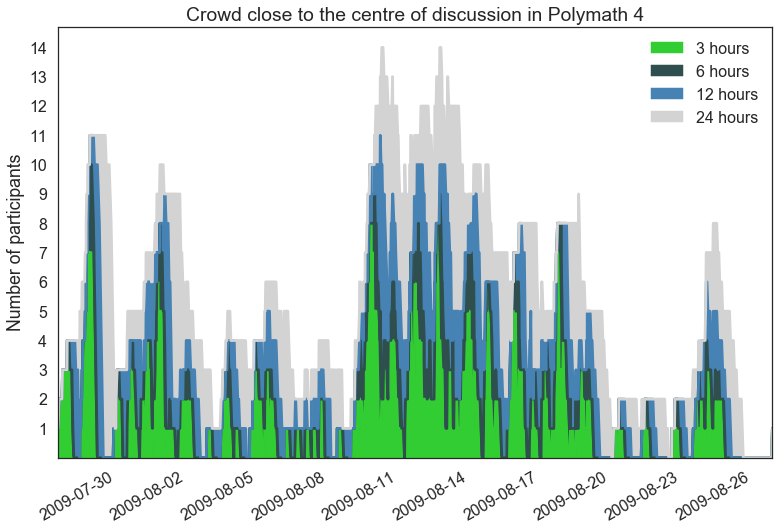

In [25]:
plot_centre_crowd(PM_FRAME, **PM4_FOCUS, show=True)

# save as crowd

# Episodes

In [60]:
pm4_data = PM_FRAME.loc["Polymath 4"]["all threads", "mthread (single)"][:3]
plot_data = DataFrame()
for i, data in pm4_data.iteritems():
        time_index, time_data, time_authors, time_cluster = zip(
            *[(com_id,
               mdata['com_timestamp'],
               mdata['com_author'],
               mdata['cluster_id'][0]) for com_id, mdata in
              data.graph.nodes_iter(data=True)])
        time_data = Series(time_data, index=time_index)
        time_data = time_data.sort_values()
        time_data = Series(time_data - time_data[0]).astype(int)
        time_data = DataFrame(
            {'time': time_data,
             'authors': Series(time_authors, index=time_index),
             'cluster': Series(time_cluster, index=time_index)})
        time_data["colors"] = [data.author_color[author] for
                               author in time_data['authors']]
        time_data["authors"] = time_data["authors"].astype("category")
        time_data["colors"] = time_data["colors"].astype("category")
        time_data["cluster"] = time_data["cluster"].astype("category")
        time_data["threads"] = full(len(time_data.index), i)
        plot_data = plot_data.append(time_data)

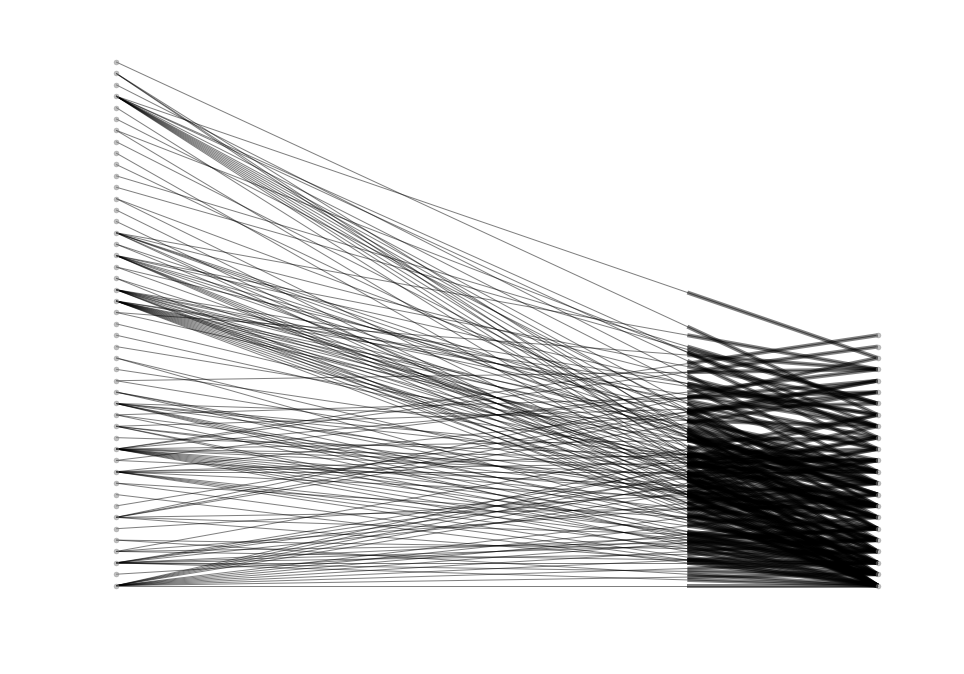

In [61]:
# creating a bi-partite graph
from networkx.algorithms import bipartite

affiliations = nx.DiGraph()

affiliations.add_nodes_from(plot_data.authors.unique(), bipartite=0) # Add the node attribute "bipartite"
affiliations.add_nodes_from(plot_data.cluster.unique(), bipartite=1)

for x in plot_data.itertuples():
    affiliations.add_edge(x.authors, x.cluster) 

    
X, Y = bipartite.sets(affiliations)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(affiliations, pos=pos, alpha=.5, node_size=25, node_color="gray")

plt.savefig("bipartite")
#nx.draw_networkx(affiliations, pos=pos, alpha=.5, node_size=10, node_color="gray")

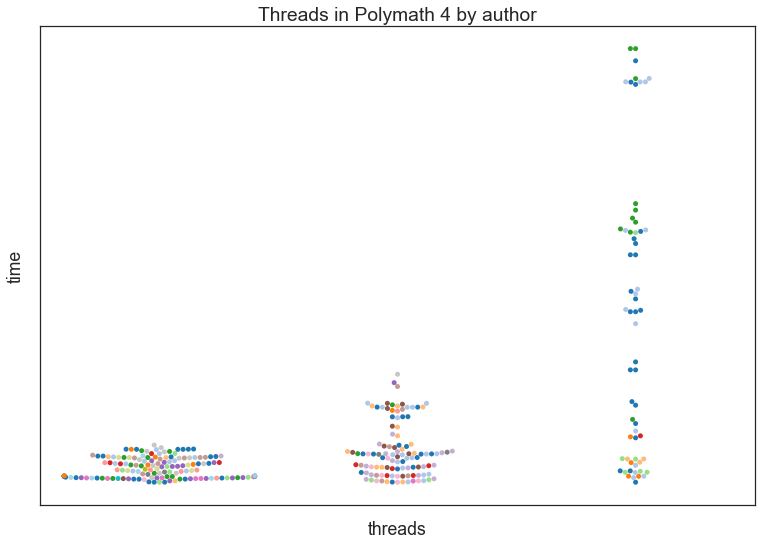

In [63]:
plot_threads_swarm(PM_FRAME, "Polymath 4", color_by="author", stage=slice(1,4))

#plt.savefig("by_author")

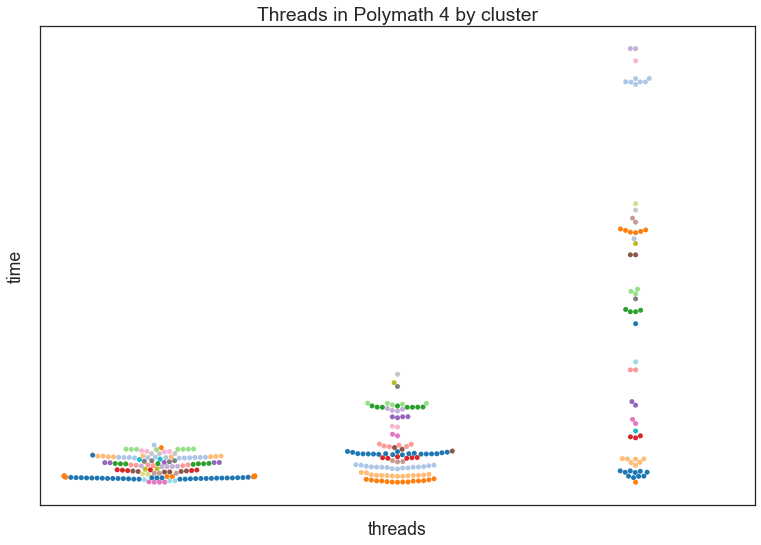

In [65]:
plot_threads_swarm(PM_FRAME, "Polymath 4", color_by="cluster", stage=slice(1,4))



#plt.savefig("by_cluster")

Give filename: PM4_inetw_full


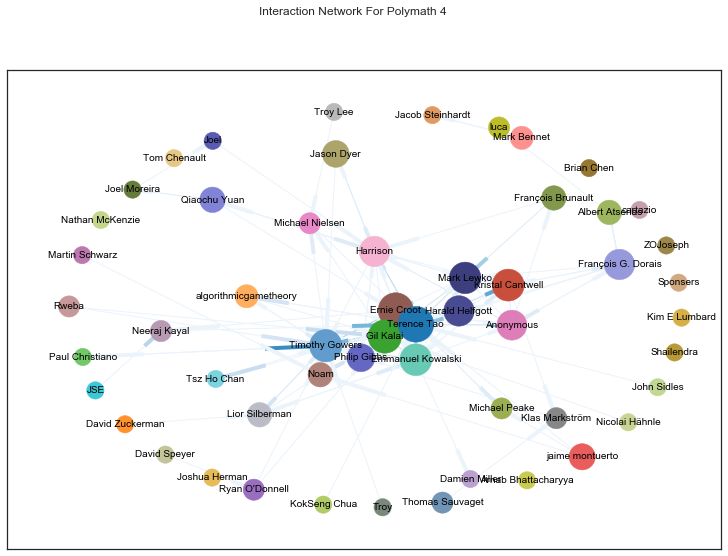

In [66]:
draw_network(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1, fontsize=10, show=False, reset=True)

# save as PM4_inetw_full

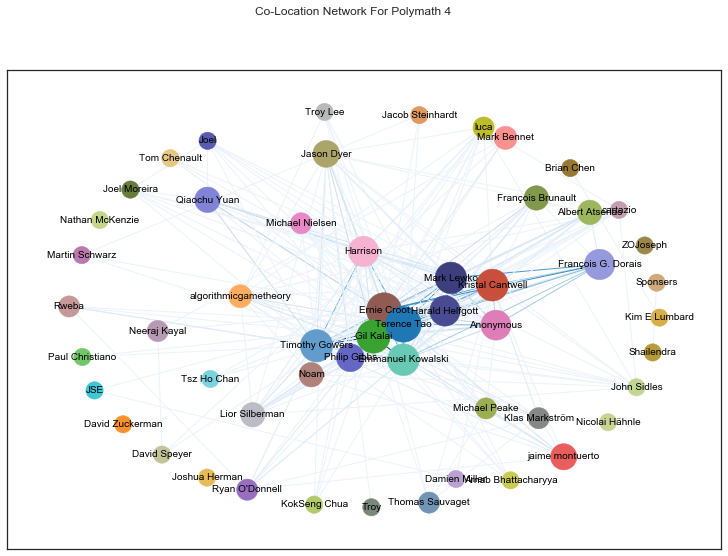

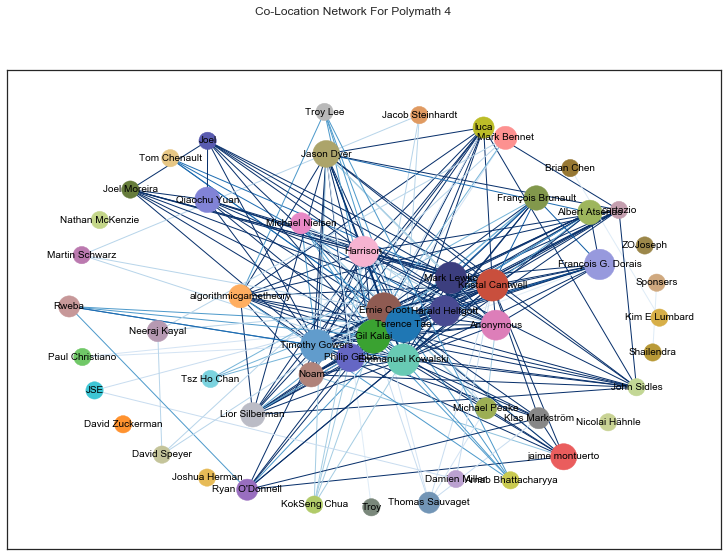

In [67]:
draw_network(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1, graph_type="cluster",
             fontsize=10, show=True, reset=False, weight="an_author_weight")

draw_network(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1, graph_type="cluster",
             fontsize=10, show=True, reset=False, weight="weight")

# save as PM4_cnetw_full

In [68]:
pm4_netw = get_project_at(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1).network
print("avg clustering interaction network (ignore weight): ", nx.average_clustering(pm4_netw.i_graph.to_undirected(), weight=None))
print("avg clustering cluster network (ignore weight):", nx.average_clustering(pm4_netw.c_graph.to_undirected(), weight=None))
print()
print("avg clustering interaction network: ", nx.average_clustering(pm4_netw.i_graph.to_undirected(), weight='weight'))
print("avg clustering cluster network (weight based on cluster-size): ", nx.average_clustering(pm4_netw.c_graph.to_undirected(), weight='weight'))
print("avg clustering cluster network (weight based on number of clusters): ", nx.average_clustering(pm4_netw.c_graph.to_undirected(), weight='simple weight'))
print("avg clustering cluster network (weight based on activity in clusters): ", nx.average_clustering(pm4_netw.c_graph.to_undirected(), weight='an_author_weight'))

avg clustering interaction network (ignore weight):  0.2840125355476233
avg clustering cluster network (ignore weight): 0.6592804574139737

avg clustering interaction network:  0.020431455088665725
avg clustering cluster network (weight based on cluster-size):  0.0878583007274
avg clustering cluster network (weight based on number of clusters):  0.6592804574139737
avg clustering cluster network (weight based on activity in clusters):  0.0446669866285


In [69]:
edge_data_i = Series({(node1, node2): data["weight"] for node1, node2, data in pm4_netw.i_graph.edges_iter(data=True)})
edge_data_c = Series({(node1, node2): data["weight"] for node1, node2, data in pm4_netw.c_graph.edges_iter(data=True)})
edge_data_c_simple = Series({(node1, node2): data["simple_weight"] for node1, node2, data in pm4_netw.c_graph.edges_iter(data=True)})
edge_data_c_comments = Series({(node1, node2): data["an_author_weight"] for node1, node2, data in pm4_netw.c_graph.edges_iter(data=True)})

edge_data = DataFrame({"interaction": edge_data_i,
                       "cluster (weight)": edge_data_c,
                       "cluster (simple weight)": edge_data_c_simple,
                       "cluster (comment_weight)": edge_data_c_comments})

In [70]:
print(edge_data.describe())

       cluster (comment_weight)  cluster (simple weight)  cluster (weight)  \
count                254.000000               254.000000        254.000000   
mean                   2.779528                 2.094488         29.779528   
std                    3.750970                 2.431457         30.786762   
min                    1.000000                 1.000000          2.000000   
25%                    1.000000                 1.000000         10.000000   
50%                    1.000000                 1.000000         23.000000   
75%                    3.000000                 2.000000         31.000000   
max                   32.000000                18.000000        174.000000   

       interaction  
count   148.000000  
mean      2.270270  
std       2.839456  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       2.000000  
max      21.000000  


In [71]:
a = set([(1, "a"), (2, "b")])
set(list(zip(*a))[0])

{1, 2}

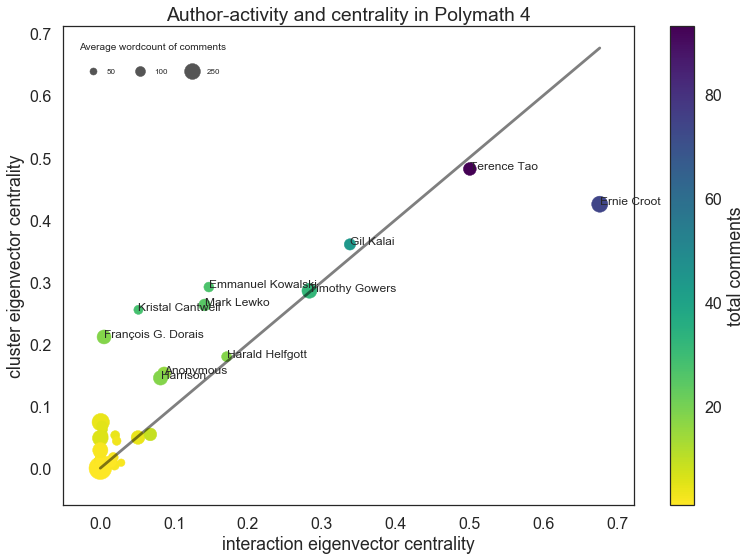

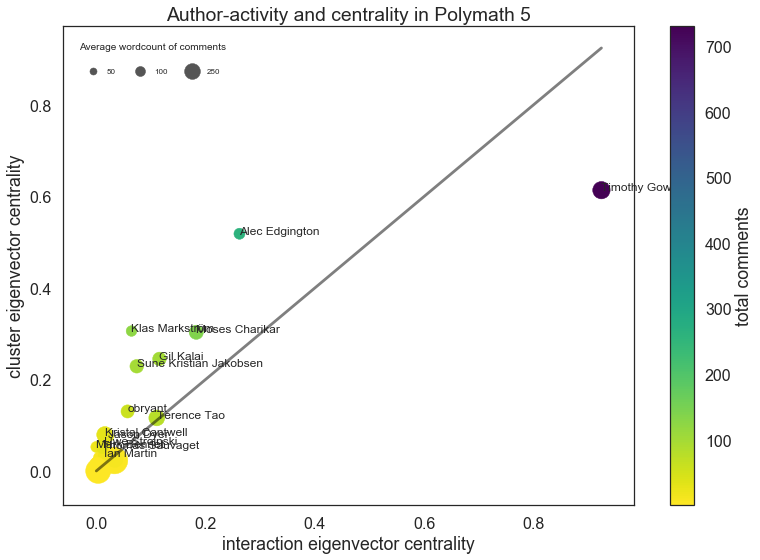

In [72]:
plot_scatter_authors(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1,
                     measure="eigenvector centrality",
                     weight={"interaction": 'weight',"cluster": 'an_author_weight'},
                    to_undirected=False, add_diagonal=True, show=True)

plot_scatter_authors(PM_FRAME, project="Polymath 5", thread_type="research threads", stage=-1,
                     measure="eigenvector centrality",
                     weight={"interaction": 'weight',"cluster": 'an_author_weight'},
                    to_undirected=False, add_diagonal=True, show=True)

# save as PM4_netw_measures

Give filename: PM4_netw_measures_u


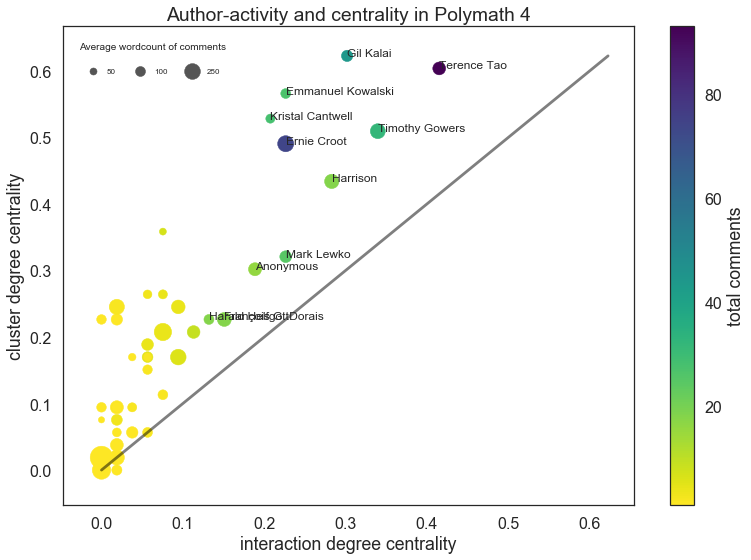

In [73]:
plot_scatter_authors(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1,
                     measure="degree centrality",
                     weight={"interaction": 'weight',"cluster": 'author_weight'},
                    to_undirected=True, add_diagonal=True, show=False)

# save as PM4_netw_measures_u

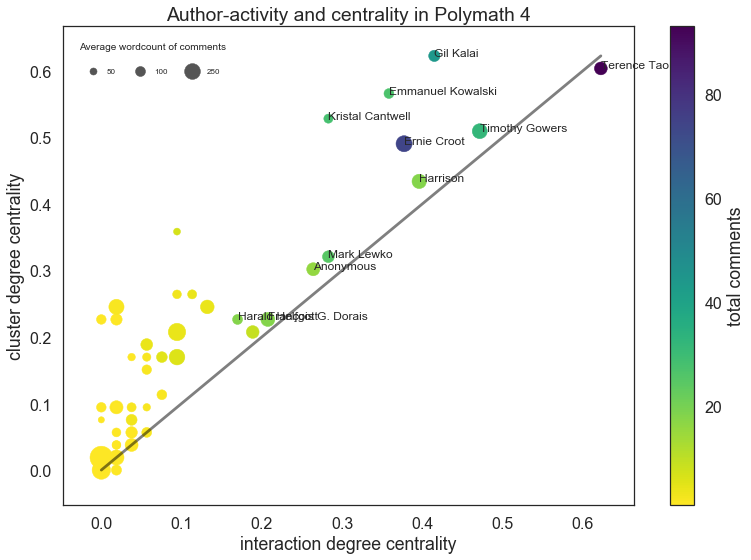

In [74]:
plot_scatter_authors(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1,
                     measure="degree centrality",
                     weight={"interaction": None,"cluster": None},
                    to_undirected=False, add_diagonal=True, show=True)